In [149]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [150]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
k = 140  # количество выборок для случайной величины W


In [151]:
# 1.1 Интервальная оценка для математического ожидания при известной дисперсии
X = np.random.normal(a, sigma, size=n)
t_gamma = st.norm.ppf(1/2 + gamma/2)
a_left_known = X.mean() - sigma * t_gamma / np.sqrt(n)
a_right_known = X.mean() + sigma * t_gamma / np.sqrt(n)
print("1.1. Доверительный интервал (известная дисперсия):", (a_left_known, a_right_known))

print("1.1. Доверительный интервал (известная дисперсия, метод interval): ", st.norm.interval(confidence=gamma, loc=X.mean(), scale=sigma/np.sqrt(n)))
t_gamma*sigma

1.1. Доверительный интервал (известная дисперсия): (0.06298152703193727, 1.1352451878907779)
1.1. Доверительный интервал (известная дисперсия, метод interval):  (0.06298152703193749, 1.1352451878907777)


2.397654435483148

In [152]:
# 1.2 Интервальная оценка для математического ожидания при неизвестной дисперсии
a_estimate = np.mean(X)
sigma_estimate = np.std(X, ddof=1)
t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
print("1.2. Доверительный интервал (неизвестная дисперсия):", (a_left_unknown, a_right_unknown))
print("1.2. Доверительный интервал (неизвестная дисперсия, метод interval): ", st.t.interval(confidence=gamma, loc=a_estimate, scale=sigma_estimate/np.sqrt(n), df=n-1))
t_gamma_unknown*sigma_estimate

1.2. Доверительный интервал (неизвестная дисперсия): (-0.09160637375920178, 1.2898330886819167)
1.2. Доверительный интервал (неизвестная дисперсия, метод interval):  (-0.09160637375920166, 1.289833088681917)


3.088992544819109

In [153]:
# 1.3 Интервальная оценка для дисперсии
delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
s2 = np.var(X, ddof=1)
sigma2_left = (n - 1) * s2 / delta_0
sigma2_right = (n - 1) * s2 / delta_1
print("1.3. Доверительный интервал для дисперсии:", (sigma2_left, sigma2_right))


1.3. Доверительный интервал для дисперсии: (1.8584647832912675, 5.729382607958851)


In [154]:
# 2. Зависимость длины доверительного интервала от надежности
V = 500
gamma_values = np.linspace(0.7, 0.999, V)
interval_lengths_mx = []
interval_lengths_var = []
interval_lengths_mx_unknown = []

for g in gamma_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)

    interval_lengths_mx_unknown.append(interval_mx_unknown)
    interval_lengths_mx.append(interval_mx)
    interval_lengths_var.append(interval_var)


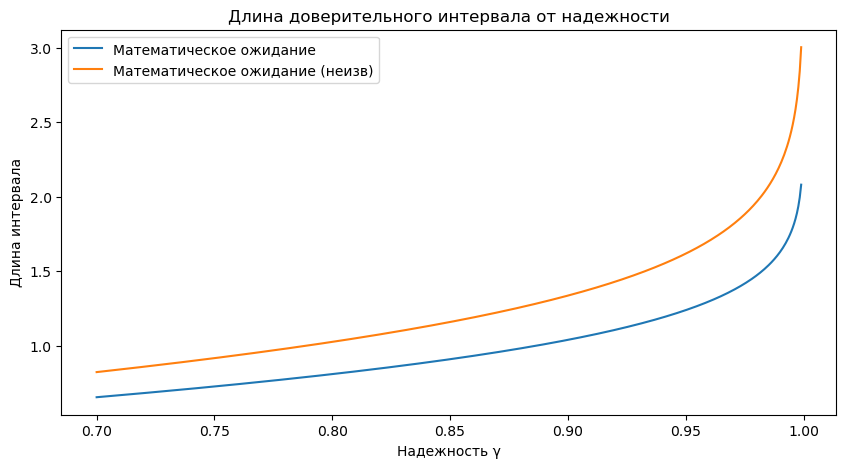

In [155]:
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, interval_lengths_mx, label="Математическое ожидание")
#plt.plot(gamma_values, interval_lengths_var, label="Дисперсия")
plt.plot(gamma_values, interval_lengths_mx_unknown, label="Математическое ожидание (неизв)")
plt.xlabel("Надежность γ")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от надежности")
plt.show()

In [156]:
# 3. Зависимость длины интервала от объема выборки
n_values = range(5, 51)
lengths_mx = []
lengths_mx_unk = []
lengths_var = []

for n in n_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    lengths_mx_unk.append(interval_mx_unknown)
    lengths_mx.append(interval_mx)
    lengths_var.append(interval_var)

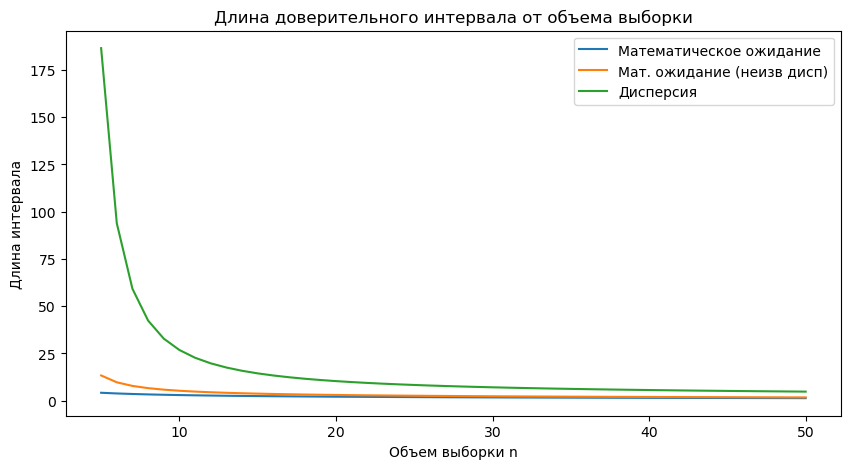

In [157]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, lengths_mx, label="Математическое ожидание")
plt.plot(n_values, lengths_mx_unk, label="Мат. ожидание (неизв дисп)")
plt.plot(n_values, lengths_var, label="Дисперсия")
plt.xlabel("Объем выборки n")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от объема выборки")
plt.show()

In [158]:
# 4. Оценка γ* при неизвестной дисперсии
count_gamma = 0
confidence_array = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s = np.std(X, ddof=1)
    t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
    a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
    a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
    confidence_array.append((a_left_unknown, a_right_unknown))
    if a_left_unknown <= a <= a_right_unknown:
        count_gamma +=1


print("Доверительный интервал для каждой из M выборок: ")
print(confidence_array)
gamma_star = count_gamma / M
print("4. Фактическая γ*:", gamma_star)

Доверительный интервал для каждой из M выборок: 
[(-0.4850931576223585, 0.36081048062389387), (-0.44498763595888613, 0.40091600228736624), (-0.1407377727397235, 0.7051658655065289), (-0.39478528228140064, 0.4511183559648517), (-0.45934158122063207, 0.3865620570256203), (-0.44634384738564065, 0.3995597908606117), (-0.3414824247007517, 0.5044212135455006), (-0.339085671222815, 0.5068179670234374), (-0.21853112493017832, 0.627372513316074), (-0.37062142377574325, 0.4752822144705091), (-0.4770346168088932, 0.36886902143735917), (-0.32571741015209627, 0.5201862280941562), (-0.5098632837698323, 0.3360403544764201), (-0.6731724353208653, 0.17273120292538702), (-0.5264932743136211, 0.3194103639326312), (-0.42130394833573065, 0.4245996899105217), (-0.7137066580218079, 0.13219698022444448), (-0.29812561771125695, 0.5477780205349954), (-0.9535030159305887, -0.10759937768433636), (-0.6974761183823729, 0.14842751986387948), (-0.2795776073811201, 0.5663260308651323), (-0.22255348354663923, 0.6233501

In [159]:
# 5. Анализ случайной величины Z
Z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s_2 = np.var(X, ddof=1)
    Z = (X.mean() - a) / (np.sqrt(s_2) / np.sqrt(n))
    Z_values.append(Z)
Z_values


[-0.33646376057365385,
 1.618947395146302,
 0.1651980817224488,
 -0.5559296447834794,
 -1.6234478963777808,
 -0.35601466027179757,
 -0.4105921956950225,
 -0.8851018914345145,
 0.08877134341151537,
 0.4303478207174399,
 0.015766584288357956,
 1.0518716450320378,
 1.079663143899313,
 1.0228569557546918,
 -1.5162910728816494,
 -0.4657229584337986,
 2.0383774951972264,
 1.2648714829391567,
 0.6524327148836963,
 -2.331173536535764,
 -0.47469400415630314,
 0.8561459818706973,
 2.7066203653707195,
 0.07879780559061363,
 -0.8473120518309692,
 -1.165951398984989,
 0.5586023862763856,
 -0.12577183430641686,
 -1.2065883336925243,
 1.5092656061596434,
 -0.5281740344325246,
 -0.9538126390208409,
 0.7497437347278915,
 -1.7830383357425448,
 -1.1755875602677224,
 0.7677475331842888,
 -1.8384149994616246,
 0.6909334471703079,
 0.5141514097643242,
 -0.0004963355507244704,
 -1.3479837817310678,
 -0.9179585732474657,
 0.13266042531453445,
 -0.020339857734929776,
 -0.9582675380773967,
 1.0062336175704594,


In [160]:
# 5.1 Вычисление характеристик
mean_Z = np.mean(Z_values)
var_Z = np.var(Z_values, ddof=1)
skew_Z = st.skew(Z_values)
kurt_Z = st.kurtosis(Z_values)
print(f"Среднее: {mean_Z}")
print(f"Дисперсия: {var_Z}")
print(f"Асимметрия: {skew_Z}")
print(f"Эксцесс: {kurt_Z}")

Среднее: 0.0015281280716334473
Дисперсия: 1.0211419116061584
Асимметрия: 0.02343611575334947
Эксцесс: 0.20385135324753278


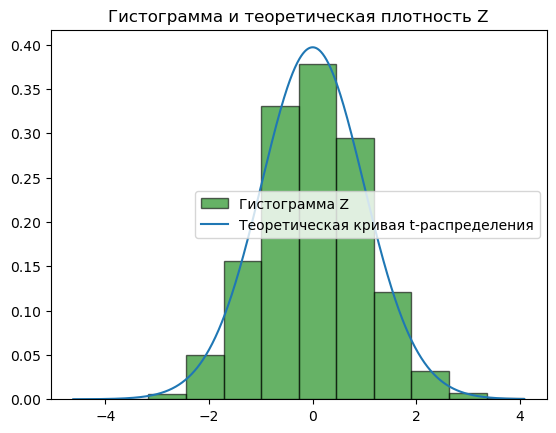

In [161]:
# 5.2 Построение графиков
plt.hist(Z_values, bins="sturges", density=True, alpha=0.6, color='g', edgecolor = 'black', label="Гистограмма Z")
x = np.linspace(min(Z_values), max(Z_values), 1000)
plt.plot(x, st.t.pdf(x, df=n-1), label="Теоретическая кривая t-распределения")
plt.legend()
plt.title("Гистограмма и теоретическая плотность Z")
plt.show()

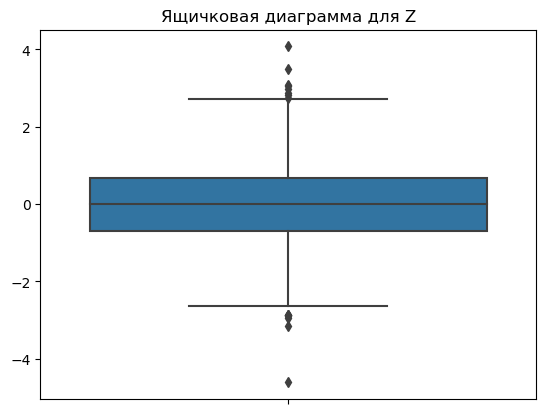

Фактическое количество выбросов: 15


In [162]:
sb.boxplot(y = Z_values)
plt.title("Ящичковая диаграмма для Z")
plt.show()
q1 = np.percentile(Z_values, 25)
q3 = np.percentile(Z_values, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in Z_values:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")